# Lecture 2: Hypothesis testing and correlation

### Definition

- *hypothesis testing* - a statistical approahc, where a null hypothesis is posed: if the null hypothesis is true, how likely is the observed pattern of results?

- *p-value* - the likelihood of null hypothesis, and indicates the statistical significance of the observed pattern of results. If the *p*-value is less than some threshold that we decide upon (e.g. *p* < 0.05), we reject the null hypothesis.

- *t-test* - is the classic method for testing whether

## Nonparametric alternatives to the t-test
### Randomization (or permutation) tests.


Let's pose the null hypothesis that the two sets of data come from the same probability distribution (not necessarily Gaussian). Under the null hyphotesis, the two sets of data are interchangeable, so if we aggregate the data points and randomly divide the data points into two sets, then the results should be comparable to the results obtained with the original data.


So, the trategy is to generate random datasets, compute some statistic from these datasets (such as difference in means or difference in medians), and then compare the resulting values to the statistic computed from the original data. We count the number of randomly obtained values that are more extreme than the actual observed value and divide this by the total number that were ran. The result is $p$-value.

Notice that we have used raw computational power to calculate the $p$-value directly instead of relying on analytical formulas.

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA57A491D0>,
      dtype=object)

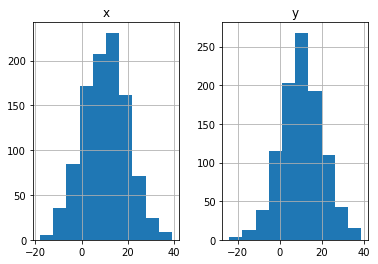

In [65]:
%pylab
%matplotlib inline
import pandas as pd

sample_size = 1000

# Set two random variables
x = pd.Series(np.random.normal(10,10,size=(sample_size)))
y = pd.Series(np.random.normal(10,10,size=(sample_size)))

# Construct data structure to store the data
df = pd.DataFrame({
    'x':x,
    'y':y
})
df.hist()

In [68]:
# Apply aggregation on data and then divide the original data.
# Besides, it must be the same tendency.

mean = df.mean()

mean

x    10.298952
y    10.471325
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA57BDEC88>,
      dtype=object)

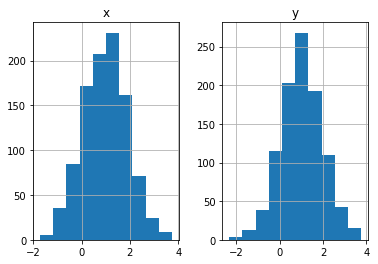

In [70]:
new_df = pd.DataFrame({
    'x': x / mean['y'],
    'y': y / mean['x'],
})

new_df.hist()


As we can see, for example, for Gaussian distribution the mean value (one of aggregated function)  didn't change significally, so there is no diffirence which sample to take, both of sample shows the same correlation even divided by the metrics of  their opposite samples.

## What the difference between resampling, randomization and bootstrapping?

- https://www.vusoft.eu/apps/help/eng/bootstrap_and_randomisatie.htm
- https://stats.stackexchange.com/questions/20217/bootstrap-vs-permutation-hypotheis-testing
- https://www.burns-stat.com/documents/tutorials/the-statistical-bootstrap-and-other-resampling-methods-2/




* **Resampling** means that the original dataset is used to generate new samples, the results of which can be analyzed. Bootstrap and randomization are two examples of resampling methods.

* **Bootstrap** is used to estimate confidence intervals (not only, but works the best for that purpose)

* **Randomization** is used to perform tests

## Correlation

- Linear relationship can be quantified using the metric of $correlation(r)$. Correlation values lie in the range **[-1,1]**, where **-1** indicates a perfect negative linear relationship, **0** indicates no relationship, and **1** indicates a perfect positive linear relationship

### Marginal distribution

- https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/distributions-two-way-tables/v/marginal-distribution-and-conditional-distribution
- https://en.wikipedia.org/wiki/Joint_probability_distribution
- https://en.wikipedia.org/wiki/Marginal_distribution
- https://slideplayer.com/slide/5942868/


Marginal variables are those variables in the subset of variables being retained.


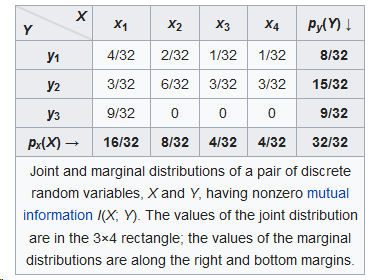

По-русски - частное распределение, вероятностное распределение одной или множества случайных величин, рассматриваемых в качестве компоненты или множества компонент некоторого известного многомерного распределения.

$$Pr(X=x) = \sum Pr(X=x, Y=y) = \sum Pr(X=x|Y=y)Pr(Y=y)$$